In [19]:
# Import Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np
import requests
import json
from pathlib import Path
from scipy import stats

In [20]:
# Store filepaths into variable
flight_data_csv = "Flight_on_time_HIX.csv"

In [21]:
# Load Flight Data
flight_data_df = pd.read_csv(flight_data_csv)
flight_data_df.head()

,Airline,Flight_Number,Plane_ID,FlightDate,Origin_Airport,Destination_Airport,Flight_Distance,Scheduled_Departure_Time,Actual_Departure_Time,Departure_Delay_Minutes,Departure_Taxi,Departure_WheelsOff,Scheduled_Arrival_Time,Actual_Arrival_Time,Arrival_Delay_Minutes,Arrival_Taxi,Arrival_WheelsOn,Delay_Reason
0,TR,4135,GJLOAB,12/1/2019,IYF,HIX,678,1,103,62,15,118,127,219,52,7,212,LateAircraft
1,TR,3776,GDISCI,12/1/2019,HEN,HIX,1700,10,25,15,21,46,616,624,8,27,557,NaN
2,RO,4754,GHHWLL,12/1/2019,HIX,IZN,413,10,10,0,15,25,242,227,0,5,222,NaN
3,XM,5604,GBGWFC,12/1/2019,HIX,IZU,130,10,44,34,34,118,111,155,44,4,151,Weather
4,XM,5612,GBISBC,12/1/2019,HIX,LKF,258,10,234,144,26,300,132,358,146,6,352,Carrier


In [22]:
time_bins = [0, 600,1200, 1800,2400]
time_labels = ["Night", "Morning", "Afternoon", "Evening"]


In [23]:
flight_data_df['Arrival_Time_Frame'] = pd.cut(flight_data_df['Scheduled_Arrival_Time'], bins=time_bins, labels=time_labels, right=False)
flight_data_df

,Airline,Flight_Number,Plane_ID,FlightDate,Origin_Airport,Destination_Airport,Flight_Distance,Scheduled_Departure_Time,Actual_Departure_Time,Departure_Delay_Minutes,Departure_Taxi,Departure_WheelsOff,Scheduled_Arrival_Time,Actual_Arrival_Time,Arrival_Delay_Minutes,Arrival_Taxi,Arrival_WheelsOn,Delay_Reason,Arrival_Time_Frame
0,TR,4135,GJLOAB,12/1/2019,IYF,HIX,678,1,103,62,15,118,127,219,52,7,212,LateAircraft,Night
1,TR,3776,GDISCI,12/1/2019,HEN,HIX,1700,10,25,15,21,46,616,624,8,27,557,NaN,Morning
2,RO,4754,GHHWLL,12/1/2019,HIX,IZN,413,10,10,0,15,25,242,227,0,5,222,NaN,Night
3,XM,5604,GBGWFC,12/1/2019,HIX,IZU,130,10,44,34,34,118,111,155,44,4,151,Weather,Night
4,XM,5612,GBISBC,12/1/2019,HIX,LKF,258,10,234,144,26,300,132,358,146,6,352,Carrier,Night
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65664,NR,2309,GCESHO,12/31/2019,LWI,HIX,1846,2310,2308,0,19,2327,508,505,0,3,502,NaN,Night
65665,YJ,2760,GHEUSF,12/31/2019,MGU,HIX,1011,2328,2324,0,14,2338,131,110,0,11,59,NaN,Night
65666,TR,1610,GBFSNO,12/31/2019,ERR,HIX,1744,2340,13,33,15,28,541,624,43,9,615,LateAircraft,Night
65667,NR,1605,GBHPZC,12/31/2019,LDZ,HIX,1781,2355,2355,0,10,5,550,545,0,3,542,NaN,Night


In [24]:


flight_data_df['Departure_Time_Frame'] = pd.cut(flight_data_df['Scheduled_Departure_Time'], bins=time_bins, labels=time_labels, right=False)


# print(delay_counts)
flight_data_df

,Airline,Flight_Number,Plane_ID,FlightDate,Origin_Airport,Destination_Airport,Flight_Distance,Scheduled_Departure_Time,Actual_Departure_Time,Departure_Delay_Minutes,Departure_Taxi,Departure_WheelsOff,Scheduled_Arrival_Time,Actual_Arrival_Time,Arrival_Delay_Minutes,Arrival_Taxi,Arrival_WheelsOn,Delay_Reason,Arrival_Time_Frame,Departure_Time_Frame
0,TR,4135,GJLOAB,12/1/2019,IYF,HIX,678,1,103,62,15,118,127,219,52,7,212,LateAircraft,Night,Night
1,TR,3776,GDISCI,12/1/2019,HEN,HIX,1700,10,25,15,21,46,616,624,8,27,557,NaN,Morning,Night
2,RO,4754,GHHWLL,12/1/2019,HIX,IZN,413,10,10,0,15,25,242,227,0,5,222,NaN,Night,Night
3,XM,5604,GBGWFC,12/1/2019,HIX,IZU,130,10,44,34,34,118,111,155,44,4,151,Weather,Night,Night
4,XM,5612,GBISBC,12/1/2019,HIX,LKF,258,10,234,144,26,300,132,358,146,6,352,Carrier,Night,Night
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65664,NR,2309,GCESHO,12/31/2019,LWI,HIX,1846,2310,2308,0,19,2327,508,505,0,3,502,NaN,Night,Evening
65665,YJ,2760,GHEUSF,12/31/2019,MGU,HIX,1011,2328,2324,0,14,2338,131,110,0,11,59,NaN,Night,Evening
65666,TR,1610,GBFSNO,12/31/2019,ERR,HIX,1744,2340,13,33,15,28,541,624,43,9,615,LateAircraft,Night,Evening
65667,NR,1605,GBHPZC,12/31/2019,LDZ,HIX,1781,2355,2355,0,10,5,550,545,0,3,542,NaN,Night,Evening


In [25]:
average_dep_delay_by_timeframe = flight_data_df.groupby('Departure_Time_Frame')['Departure_Delay_Minutes'].mean()
dep_delay_frequency_by_timeframe = flight_data_df.groupby('Departure_Time_Frame')['Departure_Delay_Minutes'].count()


average_ariv_delay_by_timeframe = flight_data_df.groupby('Arrival_Time_Frame')['Arrival_Delay_Minutes'].mean()
ariv_delay_frequency_by_timeframe = flight_data_df.groupby('Arrival_Time_Frame')['Arrival_Delay_Minutes'].count()

In [28]:
ariv_delay_reason_counts = flight_data_df.groupby(['Arrival_Time_Frame', 'Delay_Reason'])['Delay_Reason'].count()
ariv_delay_reason_counts = ariv_delay_reason_counts.reset_index(name='Counts')
ariv_primary_reasons_by_timeframe = ariv_delay_reason_counts.groupby('Arrival_Time_Frame').apply(lambda x: x.loc[x['Counts'].idxmax()])
print(ariv_primary_reasons_by_timeframe)


                   Arrival_Time_Frame  Delay_Reason  Counts
Arrival_Time_Frame                                         
Night                           Night  LateAircraft     147
Morning                       Morning           NAS    1517
Afternoon                   Afternoon  LateAircraft    2636
Evening                       Evening  LateAircraft    2305


In [29]:
dep_delay_reason_counts = flight_data_df.groupby(['Departure_Time_Frame', 'Delay_Reason'])['Delay_Reason'].count()
dep_delay_reason_counts = dep_delay_reason_counts.reset_index(name='Counts')
dep_primary_reasons_by_timeframe = dep_delay_reason_counts.groupby('Departure_Time_Frame').apply(lambda x: x.loc[x['Counts'].idxmax()])
print(dep_primary_reasons_by_timeframe)





                     Departure_Time_Frame  Delay_Reason  Counts
Departure_Time_Frame                                           
Night                               Night       Carrier     114
Morning                           Morning           NAS    1983
Afternoon                       Afternoon  LateAircraft    2706
Evening                           Evening  LateAircraft    1555


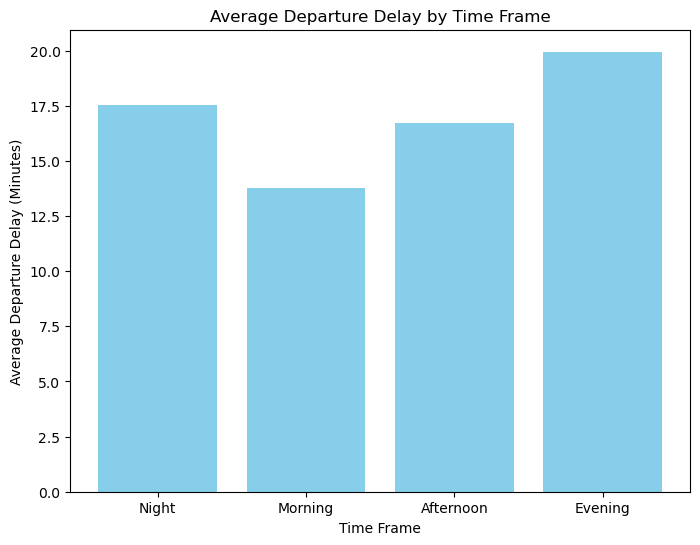

In [12]:
# Create a bar chart
plt.figure(figsize=(8, 6))  # Set the figure size
avg_delay = plt.bar(average_dep_delay_by_timeframe.index, average_dep_delay_by_timeframe, color='skyblue')  # Create the bar chart

# Add labels and a title
plt.xlabel("Time Frame")
plt.ylabel("Average Departure Delay (Minutes)")
plt.title("Average Departure Delay by Time Frame")

# Show the plot
plt.show()

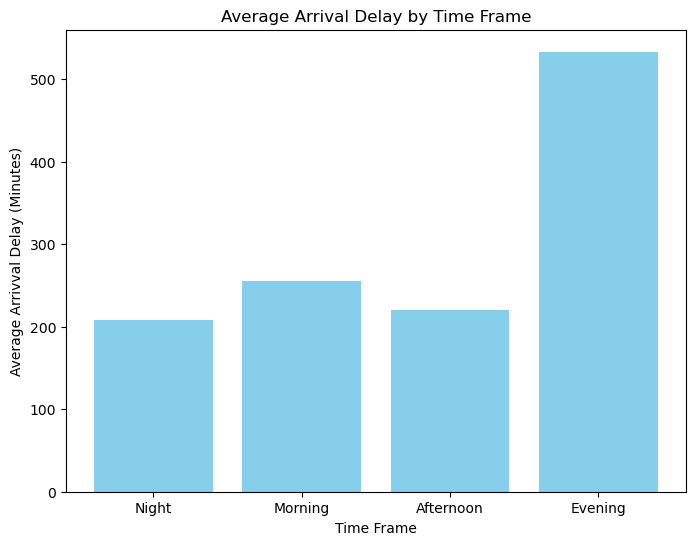

In [30]:
# Create a bar chart
plt.figure(figsize=(8, 6))  # Set the figure size
avg_delay = plt.bar(average_ariv_delay_by_timeframe.index, average_ariv_delay_by_timeframe, color='skyblue')  # Create the bar chart

# Add labels and a title
plt.xlabel("Time Frame")
plt.ylabel("Average Arrivval Delay (Minutes)")
plt.title("Average Arrival Delay by Time Frame")

# Show the plot
plt.show()

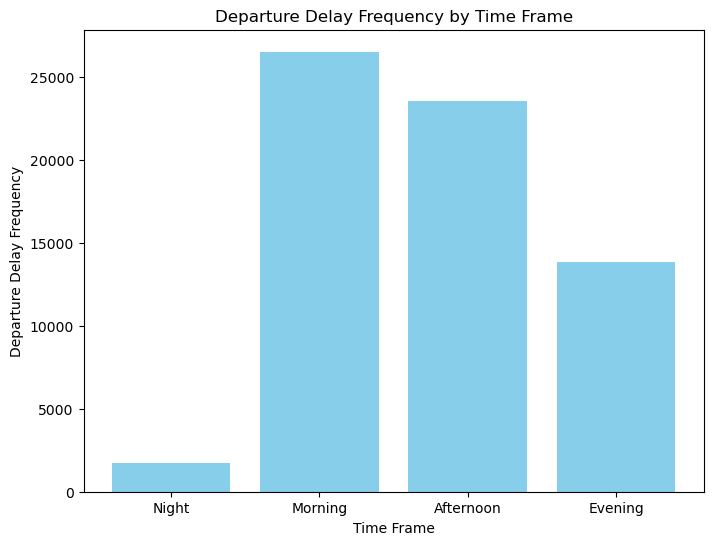

In [13]:
# Create a bar chart
plt.figure(figsize=(8, 6))  # Set the figure size
delay_reason = plt.bar(dep_delay_frequency_by_timeframe.index, dep_delay_frequency_by_timeframe, color='skyblue')  # Create the bar chart

# Add labels and a title
plt.xlabel("Time Frame")
plt.ylabel("Departure Delay Frequency")
plt.title("Departure Delay Frequency by Time Frame")

# Show the plot
plt.show()

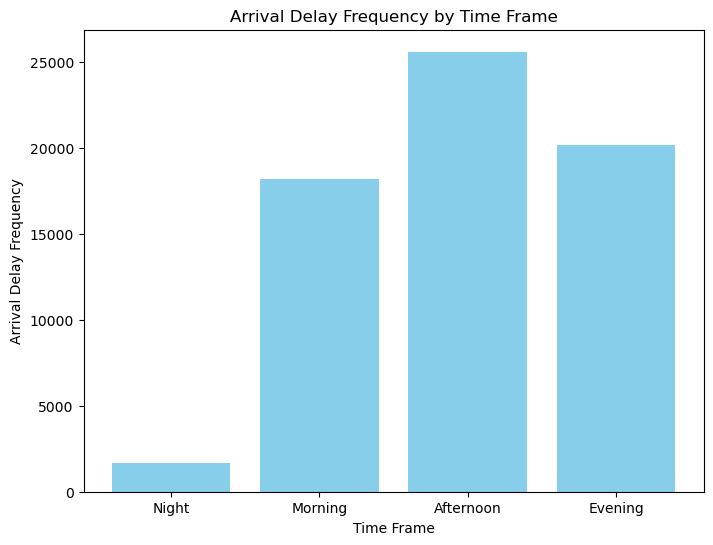

In [31]:
# Create a bar chart
plt.figure(figsize=(8, 6))  # Set the figure size
delay_reason = plt.bar(ariv_delay_frequency_by_timeframe.index, ariv_delay_frequency_by_timeframe, color='skyblue')  # Create the bar chart

# Add labels and a title
plt.xlabel("Time Frame")
plt.ylabel("Arrival Delay Frequency")
plt.title("Arrival Delay Frequency by Time Frame")

# Show the plot
plt.show()

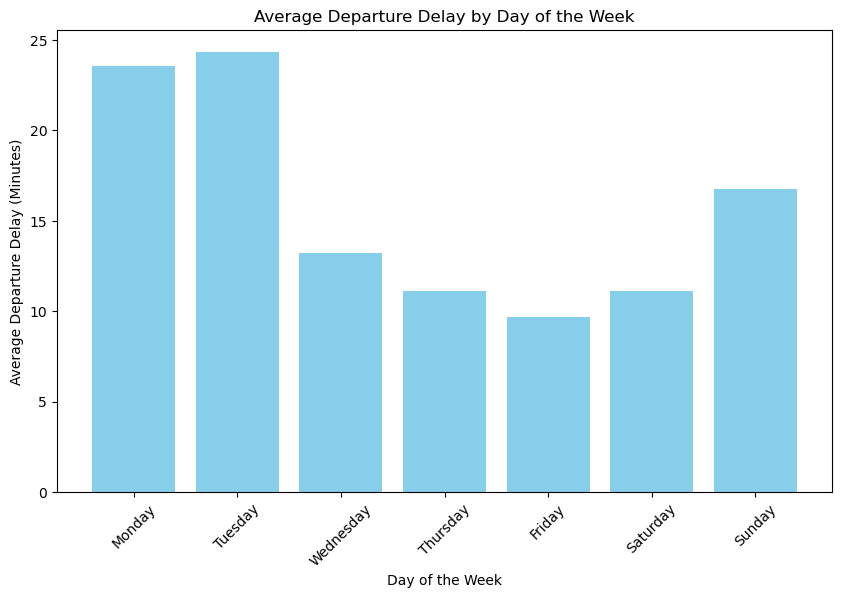

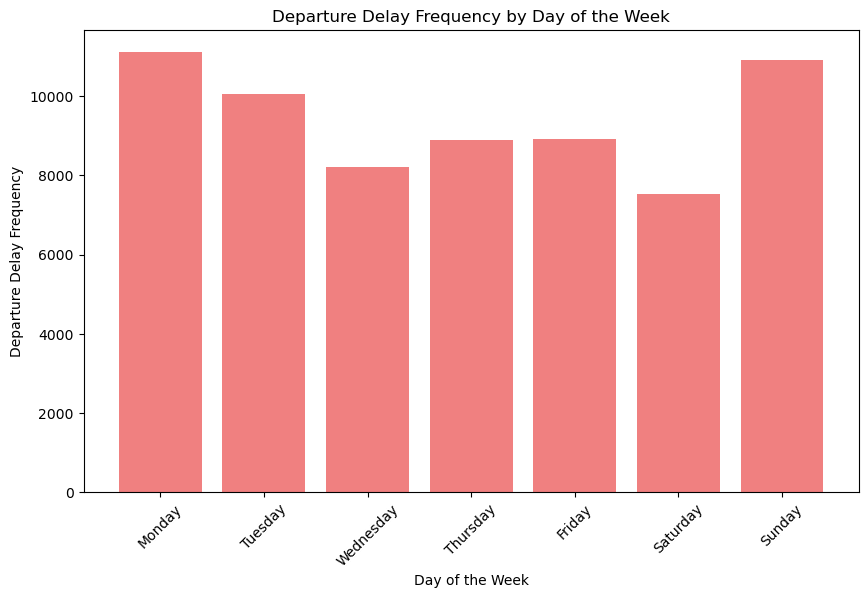

In [38]:
flight_data_df2 = flight_data_df.copy()

# Convert 'FlightDate' to datetime format
flight_data_df2['FlightDate'] = pd.to_datetime(flight_data_df2['FlightDate'])

# Extract the day of the week (0 = Monday, 6 = Sunday)
flight_data_df2['DayOfWeek'] = flight_data_df2['FlightDate'].dt.dayofweek

# Group by day of the week and calculate average delay and delay frequency
day_of_week_stats = flight_data_df2.groupby('DayOfWeek')['Departure_Delay_Minutes'].agg(['mean', 'count'])

# Rename the days of the week for better visualization
day_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
day_of_week_stats.index = [day_names[i] for i in day_of_week_stats.index]

# Plot average delay by day of the week
plt.figure(figsize=(10, 6))
plt.bar(day_of_week_stats.index, day_of_week_stats['mean'], color='skyblue')
plt.xlabel("Day of the Week")
plt.ylabel("Average Departure Delay (Minutes)")
plt.title("Average Departure Delay by Day of the Week")
plt.xticks(rotation=45)
plt.show()

# Plot delay frequency by day of the week
plt.figure(figsize=(10, 6))
plt.bar(day_of_week_stats.index, day_of_week_stats['count'], color='lightcoral')
plt.xlabel("Day of the Week")
plt.ylabel("Departure Delay Frequency")
plt.title("Departure Delay Frequency by Day of the Week")
plt.xticks(rotation=45)
plt.show()

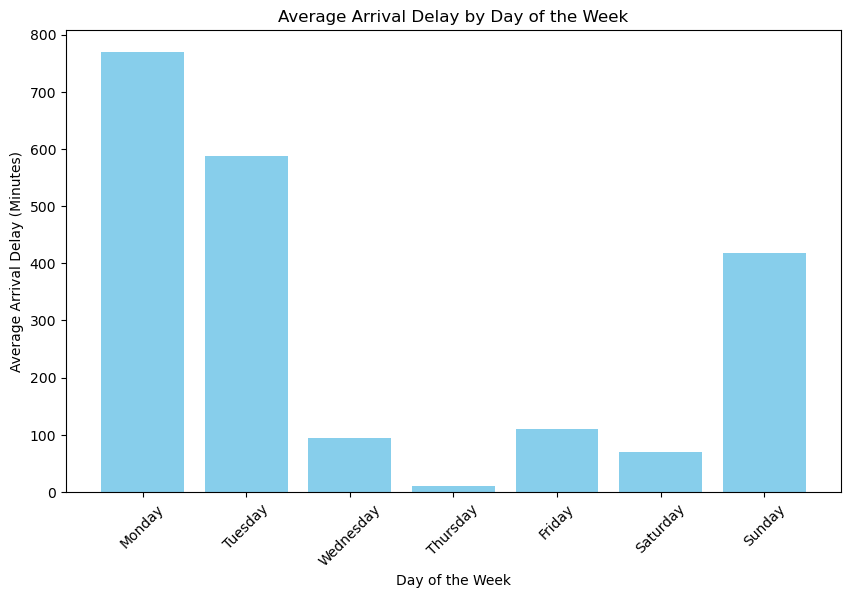

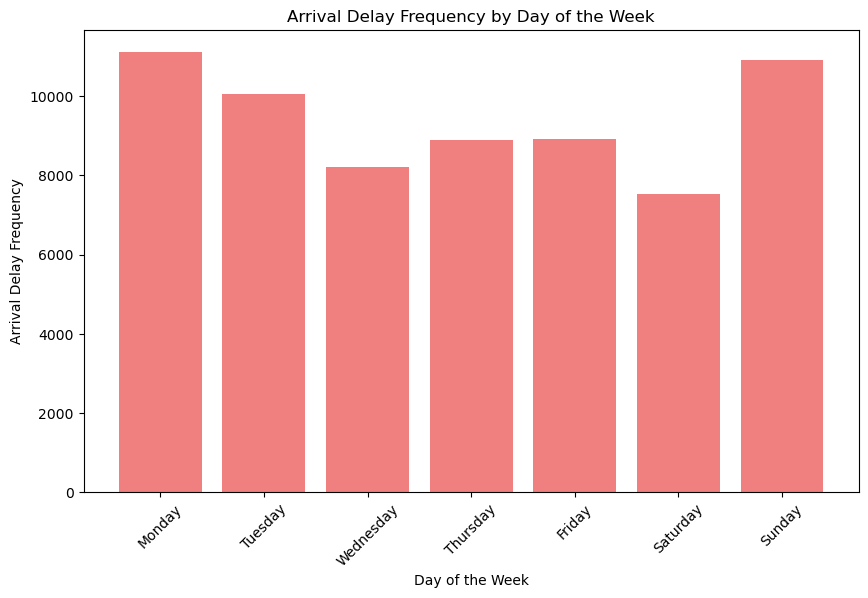

In [41]:
flight_data_df2 = flight_data_df.copy()

# Convert 'FlightDate' to datetime format
flight_data_df2['FlightDate'] = pd.to_datetime(flight_data_df2['FlightDate'])

# Extract the day of the week (0 = Monday, 6 = Sunday)
flight_data_df2['DayOfWeek'] = flight_data_df2['FlightDate'].dt.dayofweek

# Group by day of the week and calculate average delay and delay frequency
day_of_week_stats2 = flight_data_df2.groupby('DayOfWeek')['Arrival_Delay_Minutes'].agg(['mean', 'count'])

# Rename the days of the week for better visualization
day_names2 = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
day_of_week_stats2.index = [day_names2[i] for i in day_of_week_stats2.index]

# Plot average delay by day of the week
plt.figure(figsize=(10, 6))
plt.bar(day_of_week_stats2.index, day_of_week_stats2['mean'], color='skyblue')
plt.xlabel("Day of the Week")
plt.ylabel("Average Arrival Delay (Minutes)")
plt.title("Average Arrival Delay by Day of the Week")
plt.xticks(rotation=45)
plt.show()

# Plot delay frequency by day of the week
plt.figure(figsize=(10, 6))
plt.bar(day_of_week_stats2.index, day_of_week_stats2['count'], color='lightcoral')
plt.xlabel("Day of the Week")
plt.ylabel("Arrival Delay Frequency")
plt.title("Arrival Delay Frequency by Day of the Week")
plt.xticks(rotation=45)
plt.show()
